In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [9]:
gold_file_path = './input/FINAL_USO.csv'

df = pd.read_csv(gold_file_path)

y = df['Adj Close']

gold_features = ['Open', 'High', 'Low', 'Volume']
X = df[gold_features]
# df.isnull().any()

In [10]:
gold_model = LinearRegression()
gold_model.fit(X,y)

print("Making predicitons for the first 5 entries\n")
print(X.head())
print("\nThe predictions are:\n")
print(gold_model.predict(X.head()))
print("\nThe actual values are:\n")
print(y.head())

Making predicitons for the first 5 entries

         Open        High         Low    Volume
0  154.740005  154.949997  151.710007  21521900
1  154.309998  155.369995  153.899994  18124300
2  155.479996  155.860001  154.360001  12547200
3  156.820007  157.429993  156.580002   9136300
4  156.979996  157.529999  156.130005  11996100

The predictions are:

[152.55743325 154.81709905 154.92457233 157.14066214 156.77663033]

The actual values are:

0    152.330002
1    155.229996
2    154.869995
3    156.979996
4    157.160004
Name: Adj Close, dtype: float64


In [11]:
predicted_adj_close = gold_model.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = gold_model.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

0.24778906753804222
0.21905793913674523


In [12]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define a new model for training set
gold_model = LinearRegression()
# Fit model
gold_model.fit(train_X, train_y)

#get predicted prices on validation data
val_predictions = gold_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

0.22434694335749464


MAE: 0.22434694335749464


<AxesSubplot:xlabel='Adj Close'>

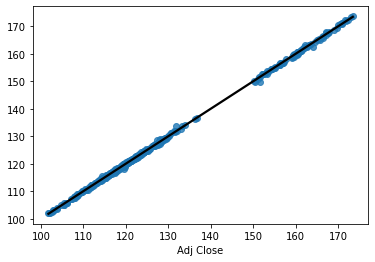

In [13]:
gold_model = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('gold_model', gold_model)])
# Preprocessing of training data, fit model
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

In [15]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is",rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)

MAE scores:
 [0.33869539 0.28749731 0.27608857 0.18376062 0.19862309 0.20854433
 0.23916281 0.16176519 0.17072235 0.14091063] 

Average MAE score (across all ten folds):
0.22057702721449735

RMSE is 0.32573358894115895

r2 score is 0.9996725196711936


In [16]:
my_model = XGBRegressor()
my_model.fit(train_X, train_y)

# Make predictions using XGBoost model
predictions = my_model.predict(val_X)
print("Mean Absolute Error: ",mean_absolute_error(predictions, val_y))


Mean Absolute Error:  0.3436271869697034


c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error 0.32507077580850213

RMSE is 0.4898371422123191

r2 score is 0.9992594343665429


<AxesSubplot:xlabel='Adj Close'>

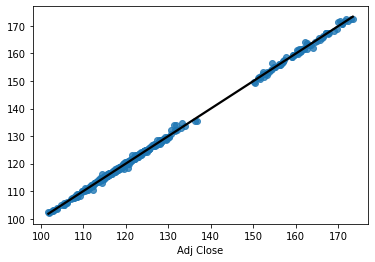

In [17]:
my_model = XGBRegressor(n_estimators=1000,
                        learning_rate=0.03,
                        n_jobs=4)
my_model.fit(train_X, train_y,
            early_stopping_rounds=5,
            eval_set=[(val_X, val_y)],
            verbose=False)

predictions = my_model.predict(val_X)
print("Mean Absolute Error",
      mean_absolute_error(predictions,val_y))

rmse = math.sqrt(mean_squared_error(val_y,predictions))
print("\nRMSE is", rmse)

r2 = r2_score(val_y,predictions)
print("\nr2 score is", r2)

sns.regplot(x=val_y, y=predictions, line_kws={"color": "black"})